<a href="https://colab.research.google.com/github/HC-JEONG/Introduction_to_Machine_Learning_with_Python/blob/master/Ch2.3.5%20Decision%20Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager as fm
from matplotlib import rc
%matplotlib inline
import pandas as pd
!pip install mglearn
import mglearn
import scipy as sp
import sklearn
import graphviz
from IPython.display import display
from sklearn.pipeline import make_pipeline
from google.colab import files
import io

!apt-get update -qq
!apt-get install fonts-nanum* -qq
sys_font=fm.findSystemFonts()
nanum_font = [f for f in sys_font if 'Nanum' in f]
nanum_font
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'

font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

fm._rebuild()

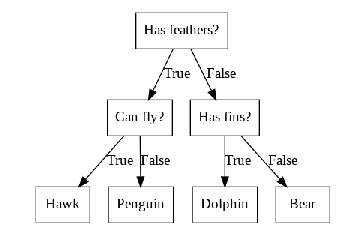

In [0]:
#실행안됨
mglearn.plots.plot_animal_tree()

## 2.3.5 결정트리

> 결정 트리(decision tree)는 결정에 다다르기 위해 예/아니오 질문을 이어 나가면서 학습한다. 목표는 최소한의 질문으로 정확하게 분류하는 것이다.

### 결정 트리 만들기

100개의 개체가 있고 반달 두 개가 포개진 듯한 모양의 임의의 데이터 셋을 만들어 two_moons라한다.

*   루트 노드(root node) : 부모 노드가 없는 노드, 모델의 첫번째 노드고 트리에 하나의 루트 노드만을 가진다.
*   순수 노드(pure node) : 타깃 하나로만 이루어진 리프 노드.

### 결정 트리의 복잡도 제어하기

> 트리 만들기를 모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 training set에 overfitting된다.

**overfitting을 막는 방법은**
*   트리 생성을 일찍 중단하는 방법(사전 가지치기(pre-pruning))
*   개체가 적은 노드를 삭제하거나 병합하는 방법(사후 가지치기(post-pruning) 또는 그냥 가지치기(pruning)).



In [0]:
#유방암 데이터셋을 이용하여 사전 가지치기의 효과 확인, data split을 하고 
# 기본값 설정으로 완전한 트리 모델을 만들고 random_state 옵션을 고정해 만들어진 트리를 같은 조건으로 비교한다.
from sklearn.tree import DecisionTreeClassifier

cancer=load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree=DecisionTreeClassifier(random_state=0) #트리를 같은 조건으로 비교
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [0]:
# max_depth=4 옵션을 주면 연속된 질문을 최대 4개로 제한한다.
tree=DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


### 결정 트리 분석

> export_graphviz 함수를 이용해 트리를 시각화 할 수 있다.

In [0]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

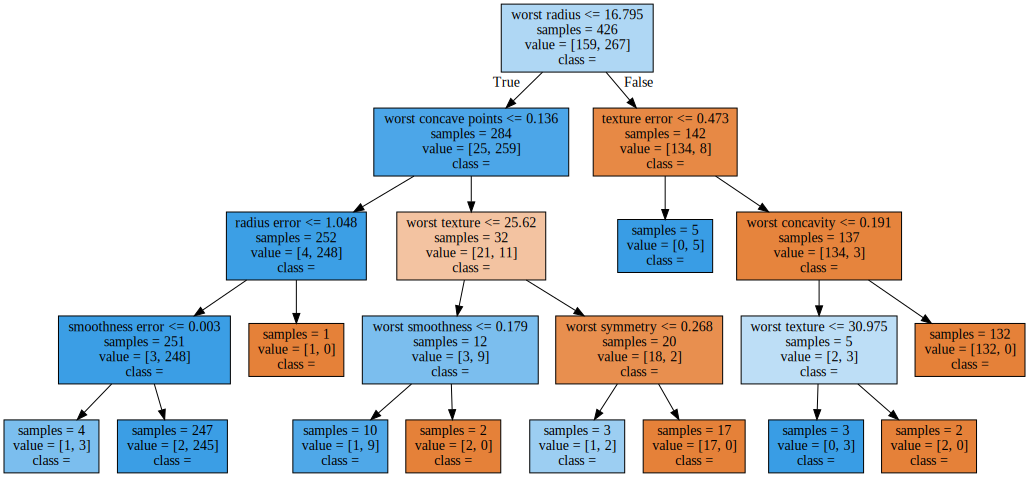

In [0]:
import graphviz
import codecs
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 트리의 특성 중요도
> 트리가 어떻게 작동하는지 요약하는 속성들을 사용 할 수 있는데 그 중 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도(feature importance)를 가장 많이 사용한다.

> 특성 중요도가 0이면 전혀 사용되지 않았다는 뜻이고 1은 완벽하게 레이블을 예측했다는 뜻이다. 특성 중요도의 전체 합은 1이다.

In [0]:
print("특성 중요도:\n", tree.feature_importances_)

특성 중요도:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


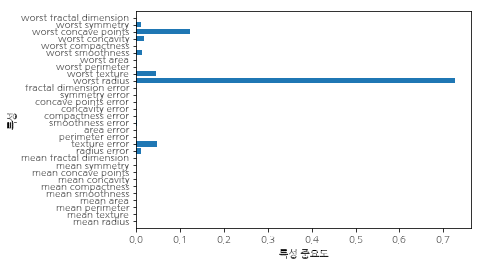

In [0]:
# 특성 중요도 시각화
def plot_feature_importances_cancer(model):
    n_features=cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

> 특성 중요도는 항상 양수이며 특성이 어떤 클래스를 지지하는지는 알 수 없다.

Feature importances: [0. 1.]


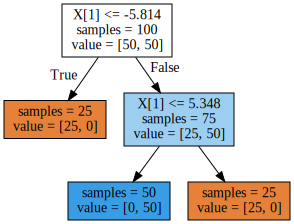

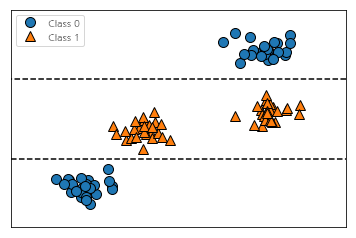

In [0]:
tree=mglearn.plots.plot_tree_not_monotone()
display(tree)

> 결정 트리로 회귀도 가능하다. DecisionTreeRegressor는 외삽(extrapolation), 즉 훈련 데이터의 범위 밖의 포인트에 대해 예측을 할 수 없다.

Text(0, 0.5, '가격 ($/Mbyte)')

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


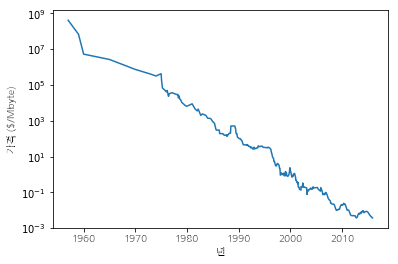

In [0]:
# x 축은 날짜, y 축은 해당 년도의 RAM 1MB당 가격이다.
import os
ram_prices=pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname="Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

In [0]:
# DecisionTreeRegressor와 LinearRegression 비교

from sklearn.tree import DecisionTreeRegressor
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date<2000]
data_test = ram_prices[ram_prices.date>=2000]

#가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date[:, np.newaxis]

pred_tree=tree.predict(X_all)
pred_lr=linear_reg.predict(X_all)

#예측한 값의 로그 스케일을 되돌립니다
price_tree=np.exp(pred_tree)
price_lr=np.exp(pred_lr)

/usr/local/lib/python3.6/dist-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
  MathTextWarning)


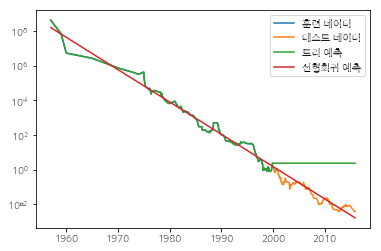

In [0]:
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()

> 모델이 가진 데이터 범위 밖으로 나가면 결정 트리는 단순히 마지막 포인트를 이용해 예측하는 게 전부다. 이는 트리 모델이 시계열 데이터엔 잘 맞지 않는다는 것을 보여준다.

> 트리 모델은 training set 밖의 새로운 데이터를 예측할 능력이 없다. 이는 모든 트리 기반 모델의 공통된 단점이다.

### 장단점과 매개변수

> 결정 트리에서 모델 복잡도를 조절하는 매개변수는 트리가 완전히 만들어지기 전에 멈추게 하는 사전 가지치기 매개변수다. max_depth, max_leaf_nodes 또는 min_samples_leaf 중 하나만 지정해도 overfitting을 막는 데 충분하다.

*   시각화할 수 있어 비전문가도 이해하기 쉽다.
*   데이터 스케일에 구애받지 않는다.
*   정규화나 표준화 같은 전처리 과정이 필요 없다.
*   이진 특성과 연속적인 특성이 혼합되어 있을 때도 잘 작동한다.
*   과대적합 되는 경향이 있다.